Reactions and their corresponding rates are as follows:

$m \rightarrow m +1$ $\;\;\;\;\;\;$  $g_m/1+K[x_{i-1}]^n $ 

$m \rightarrow m -1$ $\;\;\;\;\;\;$  $d_mm_i$ 

$X \rightarrow X +1$ $\;\;\;\;\;\;$  $g_pm_i$

$X \rightarrow X -1$ $\;\;\;\;\;\;$  $d_pX_i$



We know:


$$\frac{dP(x,t)}{dt} = \sum_{j=1}^M (a_j(x-v_j)P(x-v_j,t) - a_jxP(x,t))$$

Therefore:


$$\frac{dP(m,x,t)}{dt} = \frac{g_m}{1+K[x_{i-1}]^n} P(m-1,x,t) -  \frac{g_m}{1+K[x_{i-1}]^n} P(m,x,t) +d_m(m+1)P(m+1,x,t) -d_m(m)P(m,x,t)+ g_pm P(m,x-1,t) - g_pm P(m,x,t)+d_p (x+1) P(m,x+1,t) - d_px P(m,x,t)$$

<br>
<br>
<br>

$$\frac{dP(m1,m2,m3,x1,x,x3,t)}{dt} = \sum_{j =1,2,3}\frac{g_m}{1+K[x_{i-1}]^n} P(...,m_{i}-1,x1,x2,x3,t) -  \frac{g_m}{1+K[x_{i-1}]^n} P(m1,m2,m3,x1,x,2,x3,t) +d_m(m_i+1)P(...,m_{i}+1,x1,x2,x3,t) -d_m(m_i)P(m1,m2,m3,x1,x2,x3,t)+ g_pm_i P(m1,m2,m3,...,x_{i}-1,t) - g_pm_i P(m1,m2,m3,x1,x2,x3,t)+d_p (x_{i}+1) P(m1,m2,m3,...,x_{i}+1,t) - d_px_i P(m1,m2,m3,x1,x2,x3,t)$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random


events = [(+1,0,0,0,0,0),
(-1,0,0,0,0,0),
(0,0,0,+1,0,0),
(0,0,0,-1,0,0),
(0,+1,0,0,0,0),
(0,-1,0,0,0,0),
(0,0,0,0,+1,0),
(0,0,0,0,-1,0),
(0,0,+1,0,0,0),
(0,0,-1,0,0,0),
(0,0,0,0,0,+1),
(0,0,0,0,0,-1)]


no_events = np.arange(0,12,1)

def Sim_func(size,maxtime):
    ns = 0
    time = 0
    t = np.zeros(size)
    #vector of mRNAs and proteins
    v = np.zeros((size, 6))
    #choosing initial values
    v[0] = np.zeros((size, 6))[0] + (m1,m2,m3,x1,x2,x3)
    while time <= maxtime:
                      
        rates = np.array([gm/(1+k*v[(ns, 5)]**n),dm*v[(ns, 0)],gp*v[(ns, 0)],dp*v[(ns, 3)], 
                          gm/(1+k*v[(ns, 3)]**n),dm*v[(ns, 1)],gp*v[(ns, 1)],dp*v[(ns, 4)],
                          gm/(1+k*v[(ns, 4)]**n),dm*v[(ns, 2)],gp*v[(ns, 2)],dp*v[(ns, 5)]])
                
        total_rate  =  sum(rates)
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate 
        choose = np.random.choice(no_events, size=1, p=rates/total_rate)[0]
        
        v[ns+1] = v[ns]+ events[choose]
                
        time = time +dt
        t[ns+1]= t[ns]+dt
            
        ns = ns + 1
        if ns == size-1:
            break
    return t[0:ns], v[0:ns]

In [8]:
k = 1 #repression strength (affinity between TF and promoter)
dm = 1 #degradation rate fo mRNA
gm = 5 #Transcription rate of mRNA
dp = 10 #degradation rate of protein
gp = 10 #translation rate of protein
m1= 10;m2= 10;m3= 10;x1= 10;x2= 10;x3 = 10
n = 1


t,v = Sim_func(size = 1000000,maxtime = 100)


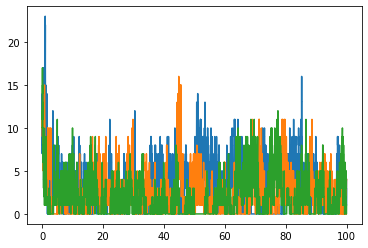

In [9]:
plt.plot(t,v[:,[3]])
plt.plot(t,v[:,[4]])
plt.plot(t,v[:,[5]]);

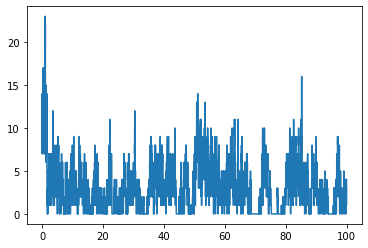

In [10]:
x1 = v[:,[3]].reshape(-1)
x2 = v[:,[4]].reshape(-1)
x3 = v[:,[5]].reshape(-1)
plt.plot(t,x1)

In [11]:
def oscillator_finder(x,threshold):
    localmax = np.add(np.where(np.diff(np.sign(np.diff(x))) == -2),2)

    localmin = np.add(np.where(np.diff(np.sign(np.diff(x))) == +2),2)
    
    if len(localmax.reshape(-1))> 1 and len(localmin.reshape(-1)) > 1:
        amp = np.max(x[localmax])  - np.min((x[localmin]))
        if amp > threshold:
            print("oscillation")
        else:
            print("no-oscillation")
    else:
        print("no-oscillation")
   
    

    
    
    
    


In [12]:
oscillator_finder(x1,3)

oscillation
